In [13]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [ ]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot

import numpy as np
import matplotlib.pyplot as plt
import os
mypath="/Users/michaelwinklhofer/local/Python/ML/NeuralNetworks/"


In [2]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [78]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.02

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [79]:
# load the mnist training data CSV file into a list
training_data_file = open(mypath+os.sep+"mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [64]:
len(training_data_list)

60000

In [80]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

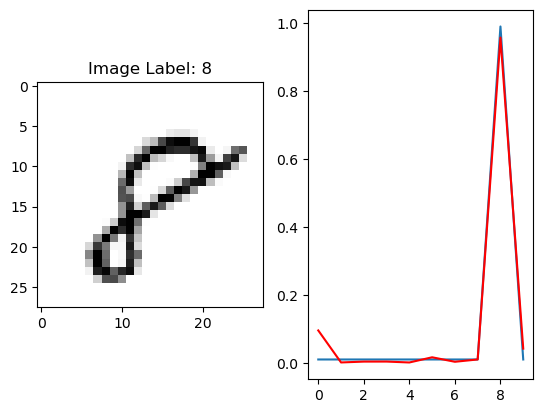

In [81]:
f,ax=plt.subplots(1,2)
ax[0].imshow(np.reshape(inputs,(28,28),order="C"),cmap=plt.cm.Greys)
ax[0].set_title("Image Label: "+all_values[0])

ax[1].plot(targets)
ax[1].plot(n.query(inputs),c='r')


In [82]:
# load the mnist test data CSV file into a list
test_data_file = open(mypath+os.sep+"mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [104]:
Ntest=len(test_data_list)
pics=np.zeros((Ntest,784))
labs=list(range(Ntest))

for i,record in enumerate(test_data_list):
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    labs[i] = int(all_values[0])
    # scale and shift the inputs
    pics[i,:]=(numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
 

from collections import Counter
cnt=Counter(labs)

for key in cnt:
    print("key: %i , %i" % (key,cnt[key]))
    

key: 7 , 1028
key: 2 , 1032
key: 1 , 1135
key: 0 , 980
key: 4 , 982
key: 9 , 1009
key: 5 , 892
key: 6 , 958
key: 3 , 1010
key: 8 , 974


In [110]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

mat = np.zeros((10,10)) # first index: true, second index: guess

inf_labels=list(range(Ntest))


# go through all the records in the test data set
for i,(lab,pic) in enumerate(zip(labs,pics)):
    outputs = n.query(pic)
    # the index of the highest value corresponds to the label
    inferred_label = numpy.argmax(outputs)
    inf_labels[i]=inferred_label
    # append correct or incorrect to list
    if (inferred_label == lab):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
        # correct positives 
        mat[lab,lab] += 1
        
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        # confused cases
        mat[lab,inferred_label] += 1

        pass

    pass

In [111]:
# print confusion matrix
for i in mat:
    print(i.astype(int))

[968   0   0   1   0   3   6   2   0   0]
[   0 1123    3    3    0    1    2    1    2    0]
[  9   3 974  17   5   0   5   6  12   1]
[  0   0   8 969   1   8   0   9   6   9]
[  1   0   3   0 944   0   7   0   3  24]
[  5   2   0  14   1 847   8   1   9   5]
[  8   3   1   1   4   9 927   0   5   0]
[  2  11  12   2   3   0   0 980   2  16]
[  6   4   3   7   9   7  11   3 921   3]
[  7   7   0   8  16   2   1   5   2 961]


In [107]:
cp_rate=np.sum(np.diag(mat))/Ntest


In [127]:
from sklearn.metrics import precision_recall_fscore_support

PRF=precision_recall_fscore_support(labs, inf_labels)

print("d\tPrecision\t\tRecall\t\t\tSUPPORT")
for i in range(10):
    print(i,PRF[0][i],PRF[1][i],PRF[3][i],sep="\t")

d	Precision		Recall			SUPPORT
0	0.9622266401590457	0.9877551020408163	980
1	0.97398091934085	0.9894273127753304	1135
2	0.9701195219123506	0.9437984496124031	1032
3	0.9481409001956947	0.9594059405940594	1010
4	0.960325534079349	0.9613034623217923	982
5	0.9657924743443558	0.9495515695067265	892
6	0.9586349534643226	0.9676409185803758	958
7	0.9731876861966237	0.953307392996109	1028
8	0.9573804573804574	0.9455852156057495	974
9	0.943081452404318	0.9524281466798811	1009


In [106]:
# calculate the performance score, the fraction of correct answers

print(len(test_data_list))
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

10000
performance =  0.9614


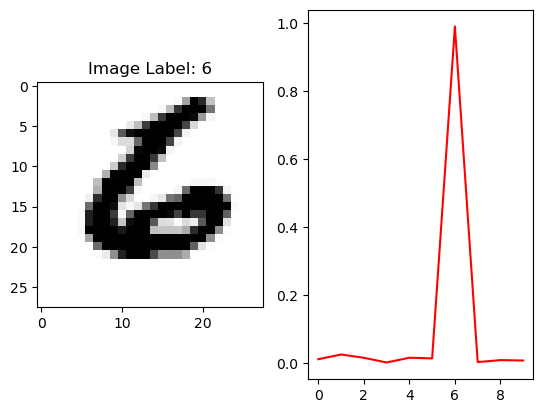

In [84]:
f,ax=plt.subplots(1,2)
ax[0].imshow(np.reshape(inputs,(28,28),order="C"),cmap=plt.cm.Greys)
ax[0].set_title("Image Label: "+str(correct_label))

ax[1].plot(targets)
ax[1].plot(n.query(inputs),c='r')


In [67]:

w=n.wih

In [69]:
w.shape

(800, 784)

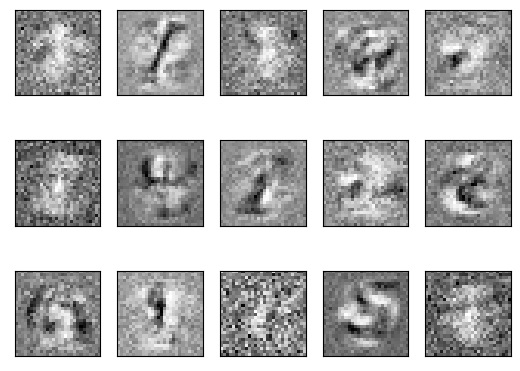

In [76]:
nrows,ncols=3,5
fig,ax=plt.subplots(nrows,ncols)
for i in range(nrows*ncols):
    ax[divmod(i,ncols)].imshow(w[i,:].reshape(28,28),cmap=plt.cm.Greys)
    ax[divmod(i,ncols)].set_xticks([],None)    
    ax[divmod(i,ncols)].set_yticks([],None)    

 